Move the cells I used to calculate the tides from "Transport" so just read them in there

In [27]:
import arrow
import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd
import xarray as xr

%matplotlib inline

In [6]:
basedir = '/results2/SalishSea/nowcast-green.201806/'
iY = 344; iX = 276; iZ = 10 

In [10]:
year = 2018
start = datetime.datetime(year, 1, 1)
endtime = datetime.datetime(year, 12, 31)
timerange = arrow.Arrow.range('day', start, endtime)
for i, day in enumerate(timerange):
    dir1 = day.format('DDMMMYY').lower()
    ymd = day.format('YYYYMMDD')
    filename = 'SalishSea_1h_'+ymd+'_'+ymd+'_grid_U.nc'
    fullfile = os.path.join(basedir, dir1, filename)
    u_vel = xr.open_dataset(fullfile)
    velocity = u_vel['vozocrtx'].isel(y=iY, x=iX).sel(depthu=iZ, method='nearest')
    u_vel.close()
    if i == 0:
        velocity_year = velocity.copy(deep=True)
        velocity.close()
    else:
        velocity_year = xr.concat([velocity_year, velocity], dim='time_counter')
        velocity.close()
    if i % 10 == 0:
        print (i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


In [ ]:
2+2

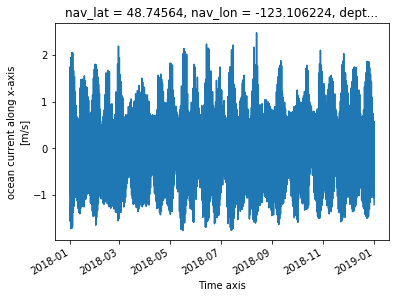

In [11]:
velocity_year.plot()

In [12]:
velocity_year.to_netcdf('velocity_2018.nc')

## Now Low Pass Filter the Velocities ##

In [11]:
velocity2015 = xr.open_dataset('velocity_2015.nc')
velocity2016 = xr.open_dataset('velocity_2016.nc')
velocity2017 = xr.open_dataset('velocity_2017.nc')
velocity2018 = xr.open_dataset('velocity_2018.nc')
velocity = xr.concat([velocity2015, velocity2016, velocity2017, velocity2018], dim='time_counter')

In [12]:
velocity

<xarray.Dataset>
Dimensions:        (time_counter: 35064)
Coordinates:
    nav_lat        float32 48.74564
    depthu         float32 9.502433
    nav_lon        float32 -123.106224
    time_centered  (time_counter) datetime64[ns] 2015-01-01T00:30:00 ... 2018-12-31T23:30:00
  * time_counter   (time_counter) datetime64[ns] 2015-01-01T00:30:00 ... 2018-12-31T23:30:00
Data variables:
    vozocrtx       (time_counter) float32 -1.2350742 -1.3236063 ... -1.2077749

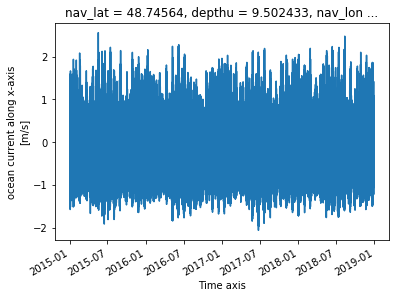

In [14]:
velocity.vozocrtx.plot();

In [17]:
velsquared = velocity * velocity
velsquared

<xarray.Dataset>
Dimensions:        (time_counter: 35064)
Coordinates:
    nav_lat        float32 48.74564
    depthu         float32 9.502433
    nav_lon        float32 -123.106224
    time_centered  (time_counter) datetime64[ns] 2015-01-01T00:30:00 ... 2018-12-31T23:30:00
  * time_counter   (time_counter) datetime64[ns] 2015-01-01T00:30:00 ... 2018-12-31T23:30:00
Data variables:
    vozocrtx       (time_counter) float32 1.5254081 1.7519335 ... 1.4587202

In [18]:
day_avg_tide_vel = velsquared.resample(time_counter='1D').mean()

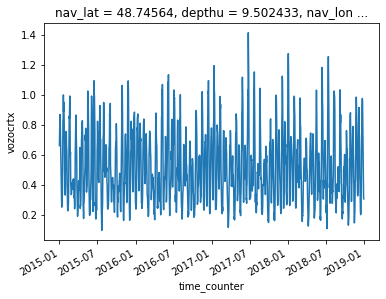

In [20]:
day_avg_tide_vel.vozocrtx.plot();

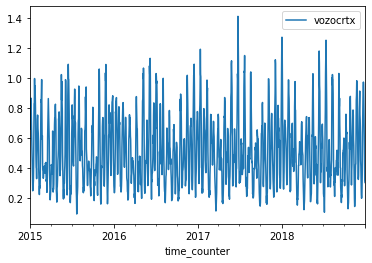

In [25]:
day_avg_tide_pd = day_avg_tide_vel.to_dataframe()
day_avg_tide_pd = day_avg_tide_pd.drop('depthu', 1)
day_avg_tide_pd = day_avg_tide_pd.drop('nav_lat', 1)
day_avg_tide_pd = day_avg_tide_pd.drop('nav_lon', 1)
day_avg_tide_pd.to_csv('day_avg_tide_pd.csv')
day_avg_tide_pd.plot()

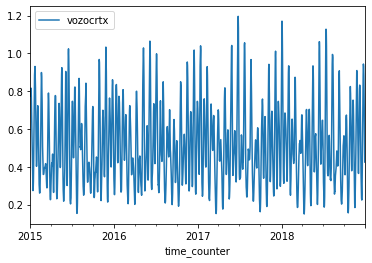

In [30]:
low_pass_tide = day_avg_tide_pd.rolling(4, center=True).mean()
low_pass_tide.to_csv('low_pass_tide.csv')
low_pass_tide.plot()

In [31]:
velocity2015.close()
velocity2016.close()
velocity2017.close()
velocity2018.close()